### Assignment Name: Linear Regression (BoomBikes)

### Step 1 - Importing libraries

In [1]:
# For analysis and numerical functions
import numpy as np
import pandas as pd

# For Visualazation
import matplotlib.pyplot as plt
import seaborn as sns

# For Train Test model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

# For best feature variable selection
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Reading and Understanding the Data

In [2]:
# Read bike data into 'bike_data' dataframe
bike_data = pd.read_csv("day.csv", low_memory=False)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check data info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Check the shape
bike_data.shape

(730, 16)

In [5]:
# Check data type of all the columns
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# Check missing values
bike_data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# Check the details of numeriacl data
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check the columns
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# Check the datatypes
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Removing casual, registered,instant and dteday as dont see any usage for analysis
bike_data.drop(['casual'],axis=1,inplace=True)
bike_data.drop(['registered'],axis=1,inplace=True)
bike_data.drop(['instant'],axis=1,inplace=True)
bike_data.drop(['dteday'],axis=1,inplace=True)

In [11]:
# See Data after deletting above columns
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Check data info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
# Check the shape
bike_data.shape

(730, 12)

In [14]:
# Check the columns
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
# Check the correlation
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


Above correlation shows that season, month and weekday supposed to be non-numerical are numerical which should be changed.

In [16]:
# Check unique values for each columns
bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [17]:
# Check unique values for season
bike_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
# Check unique values for weathersit
bike_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

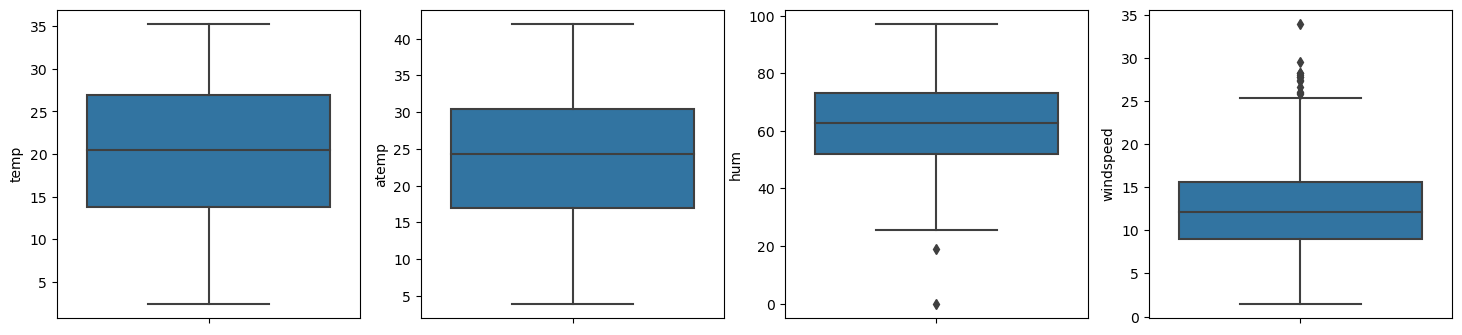

In [19]:
# Check outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1

Above plot shows that we don't have any outliers.

### Step 3: EDA

In [20]:
# Mapping the season column
bike_data.season = bike_data.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [21]:
# Mapping the weathersit column
bike_data.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)

In [22]:
# Mapping the mnth column
bike_data.mnth = bike_data.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [23]:
# Mapping the weekday column
bike_data.weekday = bike_data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})

In [24]:
# See Data after mapping above columns
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


#### Step 3.1: Checking linear relationship

<Figure size 1500x3000 with 0 Axes>

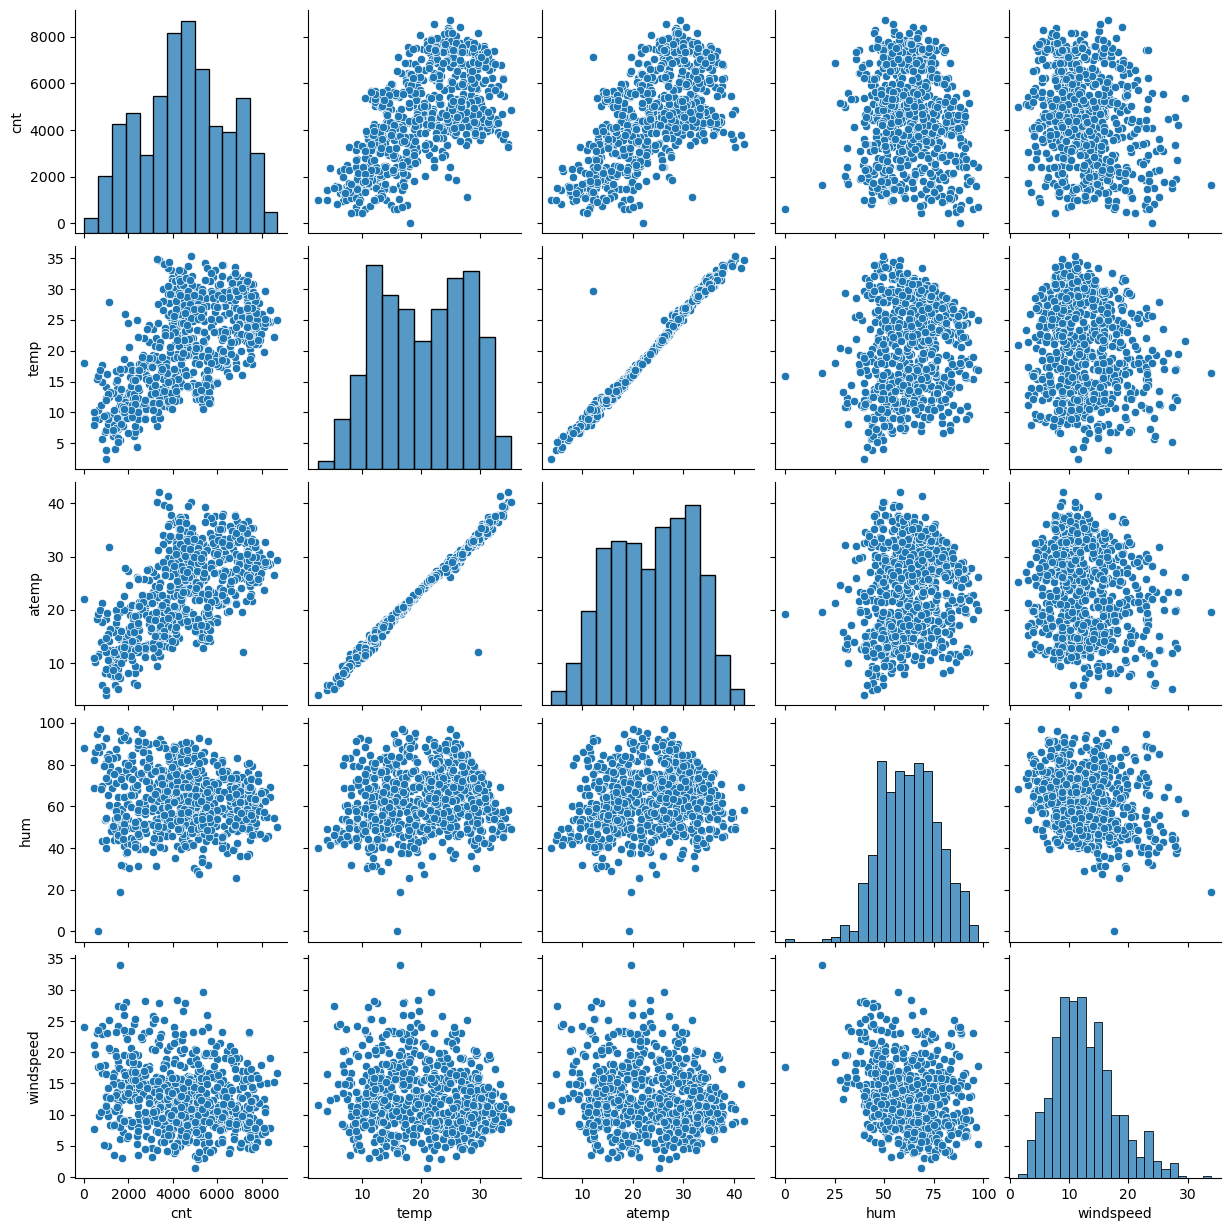

In [25]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Above plots shows that temp and atemp are having high correlations and we can say that there is alinear relationship between temp and atemp.

#### Step 3.2: Checking linear relationship on numerical variables

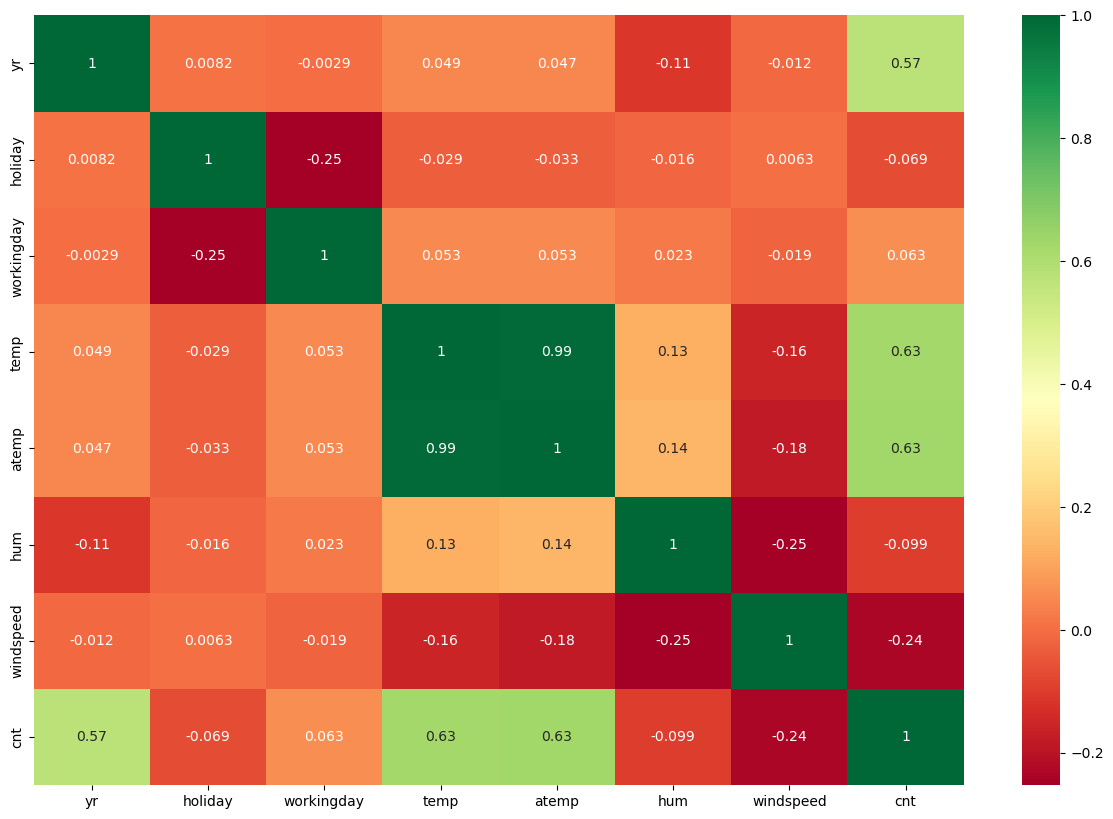

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_data.corr(),cmap="RdYlGn",annot=True)
plt.show()

#### Step 3.3: Visualising the categorical variables

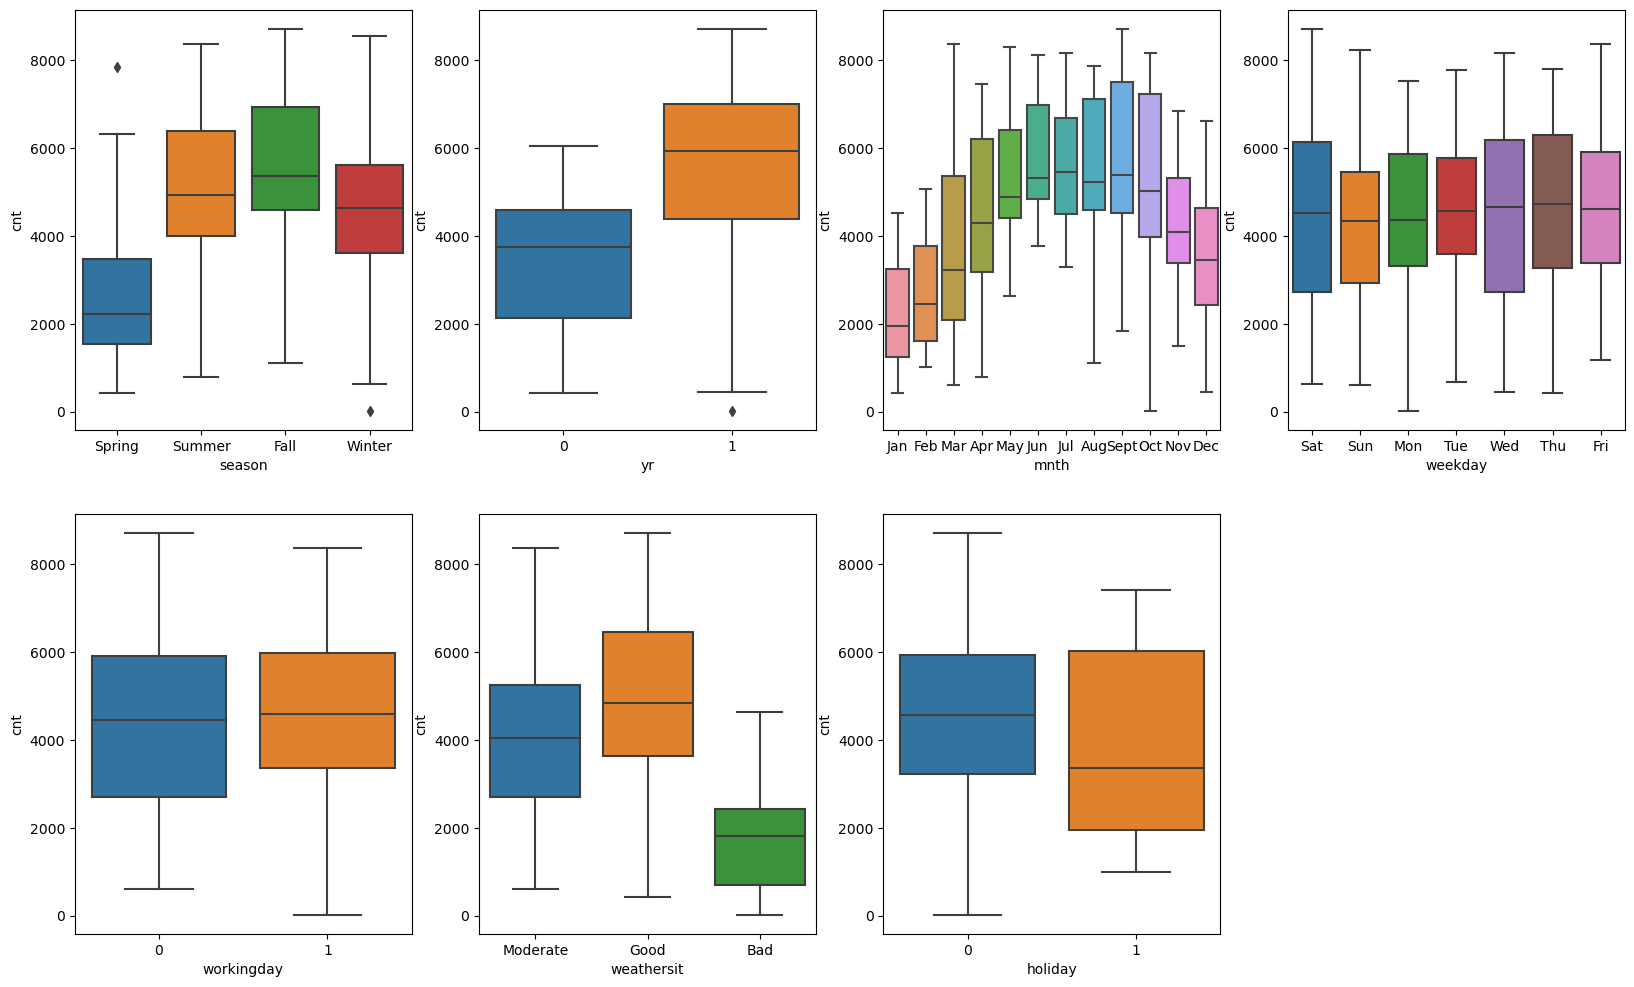

In [27]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike_data)

plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike_data)

plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data)

plt.subplot(2,4,4)
sns.boxplot(x='weekday',y='cnt',data=bike_data)

plt.subplot(2,4,5)
sns.boxplot(x='workingday',y='cnt',data=bike_data)

plt.subplot(2,4,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)

plt.subplot(2,4,7)
sns.boxplot(x='holiday',y='cnt',data=bike_data)

plt.show()

#### Step 3.4: Correlation betweeen numeric features

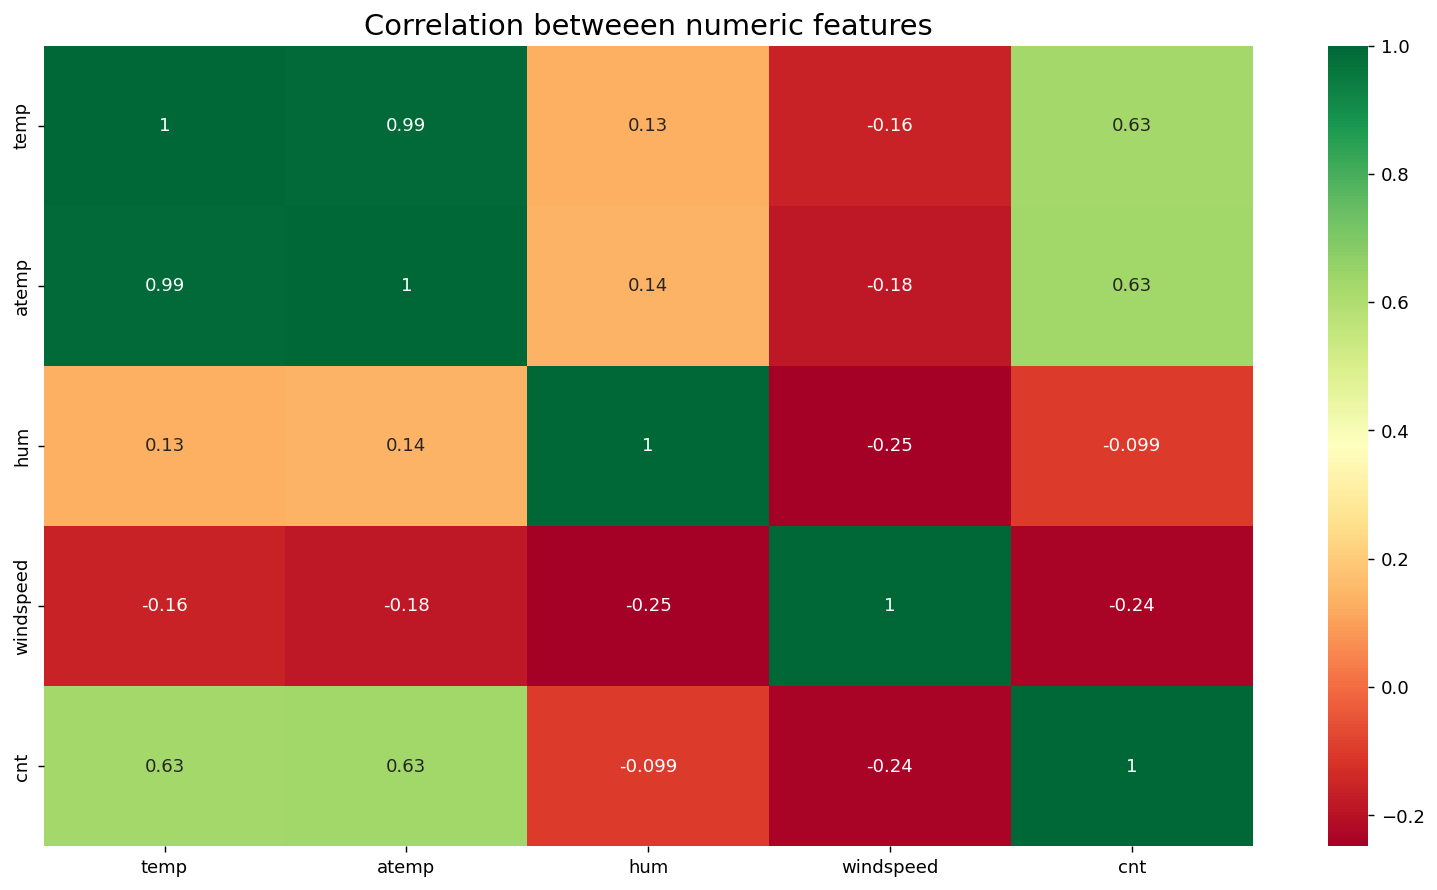

In [28]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike_data[num_features].corr(),annot= True,cmap="RdYlGn")
plt.show()

In [29]:
# Check the details of numeriacl data
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Step 4: Data preparation for linar regression

#### Step 4.1: Create Dummy Variables

In [30]:
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

In [31]:
# See Data after creating Dummy Variables
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
# Check shape
bike_data.shape

(730, 31)

#### Step 4.2: Splitting data into train and test data

In [33]:
#y to contain only target variable
y=bike_data.pop('cnt')

In [34]:
#X is all remainign variable also our independent variables
X=bike_data

In [35]:
#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=100)

In [36]:
# Check the shape of training datatset
X_train.shape

(510, 30)

In [37]:
# Check the shape of test datatset
X_test.shape

(220, 30)

#### Step 4.3:  Using MinMaxScaler to Rescaling the features

In [38]:
# Scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [39]:
# Describing the X_train dataset
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 5: Build model using Recursive Feature Elimination (RFE)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 13),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 10),
 ('mnth_Oct', False, 3),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 16),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [43]:
# Building a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [44]:
# Generic function to calculate VIF of variables
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [45]:
# Columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [46]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [47]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [48]:
# Checking shape
X_train_rfe.shape

(510, 15)

####  Model 1

In [49]:
# Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          9.38e-190
Time:                        21:23:46   Log-Likelihood:                -4114.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1121.8238    

####  Model 2

In [50]:
# Dropping the variable 'holiday' as it has high VIF
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          9.38e-190
Time:                        21:23:46   Log-Likelihood:                -4114.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 883.3048    

####  Model 3

In [51]:
# Dropping the variable 'weathersit_Good' as it has high VIF
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          9.38e-190
Time:                        21:23:46   Log-Likelihood:                -4114.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2069.3178    

####  Model 4

In [52]:
# Dropping the variable 'hum' as it has high VIF
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.26e-187
Time:                        21:23:46   Log-Likelihood:                -4122.7
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     497   BIC:                             8326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1372.0737    

####  Model 5

In [53]:
# Dropping the variable 'workingday' as it has high VIF
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          1.84e-185
Time:                        21:23:46   Log-Likelihood:                -4130.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2245.2864    

####  Model 6

In [54]:
# Dropping the variable 'weekday_Sat' as it has high p-value
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Sun', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.75e-186
Time:                        21:23:46   Log-Likelihood:                -4131.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     499   BIC:                             8332.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2269.6791    

#### Model 7

In [55]:
# Dropping the variable 'mnth_Sept' as it has high p-value
cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'weekday_Sun', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          3.39e-185
Time:                        21:23:46   Log-Likelihood:                -4137.1
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     500   BIC:                             8336.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2260.3170    

#### Model 8

In [56]:
# Dropping the variable 'season_Winter' as it has high p-value
final_cols = ['yr', 'temp', 'windspeed',
       'season_Spring', 'mnth_Jul', 'weekday_Sun', 'weathersit_Bad',
       'weathersit_Moderate']

build_model(final_cols)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(final_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     294.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.58e-184
Time:                        21:23:46   Log-Likelihood:                -4143.0
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     501   BIC:                             8342.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2710.0402    

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.82, hence we finalize this model to use further.

#### Step 7: Build model with all columns to select features automatically

In [57]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [58]:
# Building the model using sklearn
lr = build_model_sk(X_train[final_cols],y_train)
print(lr.intercept_,lr.coef_)

2710.0401581069327 [ 2042.14179314  3552.06695705 -1383.74362591 -1279.0799367
  -705.78184395  -379.30895464 -2381.32880711  -688.19820665]


#### Step 8: Residual Analysis

In [59]:
y_train_pred = lr.predict(X_train[final_cols])

#### Normality of error terms

In [60]:
# Ploting a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

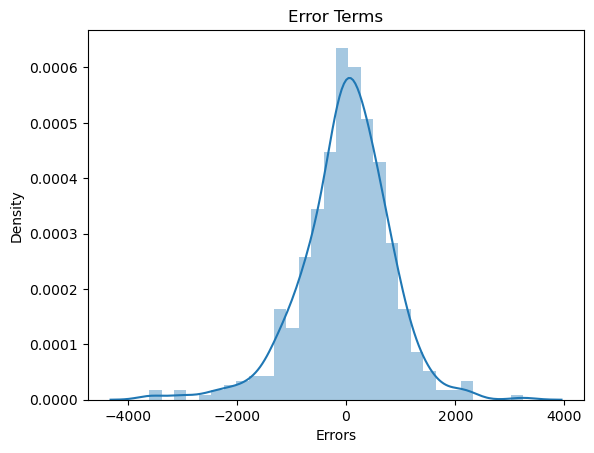

In [61]:
plot_res_dist(y_train, y_train_pred)

Error terms are following normal distribution

#### Multi Colinearity

In [62]:
get_vif(final_cols)

              Features   VIF
1                 temp  4.25
2            windspeed  3.78
0                   yr  2.03
3        season_Spring  1.52
7  weathersit_Moderate  1.48
4             mnth_Jul  1.28
5          weekday_Sun  1.15
6       weathersit_Bad  1.06


VIF values are less than 5 which is good.

#### Actual vs Predicted

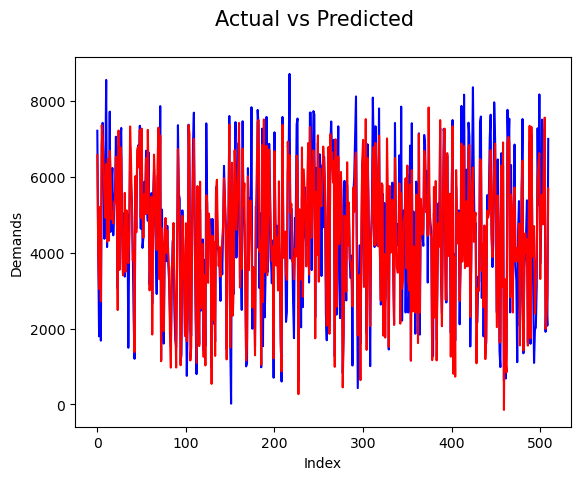

In [63]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Step 9: Model Predictions

#### R-Squared value for train predictions

In [64]:
# Get R-Squared
r2_score(y_train,y_train_pred)

0.824583191262765

#### Prediction of values on test dataset

In [65]:
# Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

# Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [66]:
# Predicting test data values
y_test_pred = lr.predict(X_test[final_cols])

#### R-Squared value for test predictions

In [67]:
# R squared value between test and predicted test data sets
r2_score(y_test,y_test_pred)

0.8008934714096982

#### Evaluating the model

In [68]:
# Evaluating the model based on r2_score
y_pred=y_test_pred
r2 = r2_score(y_test, y_pred)
round(r2,4)
r2

0.8008934714096982

Text(0, 0.5, 'y_pred')

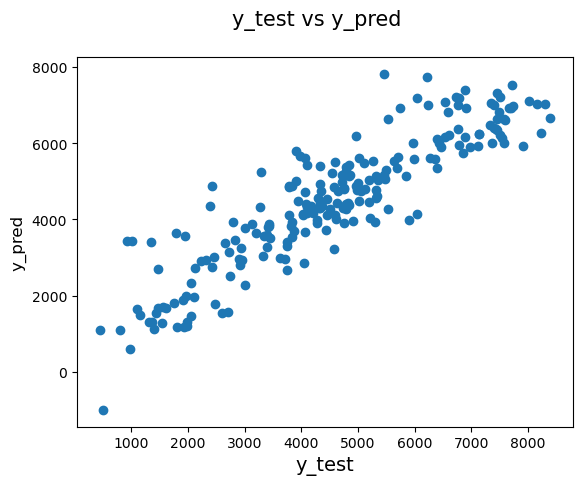

In [69]:
# Plot y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [70]:
# Rebuild the final model of manual + rfe approach using statsmodel to interpret it
lm = build_model(final_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     294.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          6.58e-184
Time:                        21:23:47   Log-Likelihood:                -4143.0
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     501   BIC:                             8342.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2710.0402    

### Conclusion

 - Train dataset R^2          : 0.82
 - Test dataset R^2           : 0.80
    
Significant variables to predict the demand for shared bikes

- temp
- season (Spring, Winter)
- months (July, November, December)
- yr
- weathersit (Good, Bad)